# BL40A2010 Introduction to IoT-Based Systems

## Assignment 2, 11.2.2023

### Author: Touko Tikkanen

**(1) Give one example of each of the following type of data.**

(a) Analog: The sound of violing being played.

(b) Digital: Recording of a sound.

(c) Primary: Time series of mobile data usage.

(d) Secondary (i.e., lack of data that is informative): Gaps in mobile data usage, which could show person's sleeping pattern.

(e) Metadata: The model and producer of the mobile phone being used.

(f) Environmental: Amusement park's daily ticket sales can give information on the average weather of the day.

**(2) Write one example when the same structured data can be classified as (a) information, (b) redundancy and (c) not interpretable.**

A nonfiction book about fish is written in English, following the syntax and semantics of the language. The book is information when the reader can understand English well and finds new facts about fish in the book. The book would be redundant if the reader understand English, but has read a Finnish translation of the same book before, and doesn't find new facts in the book. The book would not be interpretable if the reader does not understand English.

**(3) Photo-voltaic generation converts the sun's radiation into usable electricity. In this task, you will get the *direct solar radiation* with 1 minute time interval from the *Radiation observations*  at [FMI](http://en.ilmatieteenlaitos.fi/download-observations#!/). Plot radiation profile of three different days so that one must be in March, other in July and the last in December (regardless of the year). What measuring station was used? Compare the solar radiation in those 3 days and provide *information* about the potential of solar generation in those days. You can also select the measuring station (but write it in the answer).**

*Hint:* Code like in the tutorial notebook.

In [ ]:
! pip install scikit-dsp-comm
! pip install --upgrade numpy
! pip install --upgrade matplotlib
! pip install --upgrade pandas

import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 

plt.rcParams['figure.figsize'] = 16, 6
from matplotlib import style
style.use('bmh')
import warnings
warnings.filterwarnings('ignore')

In [2]:
# data from Jokioinen, Ilmala measuring station

data_march = pd.read_csv("jokioinen01032021.csv",dayfirst=True,sep=",",
                           header=0,decimal=b".",index_col=0, 
                           parse_dates= [[0, 1, 2, 3]],usecols=[0,1,2,3,5]);

data_july = pd.read_csv("jokioinen01072021.csv",dayfirst=True,sep=",",
                           header=0,decimal=b".",index_col=0, 
                           parse_dates= [[0, 1, 2, 3]],usecols=[0,1,2,3,5]);

data_dec = pd.read_csv("jokioinen01122021.csv",dayfirst=True,sep=",",
                           header=0,decimal=b".",index_col=0, 
                           parse_dates= [[0, 1, 2, 3]],usecols=[0,1,2,3,5]);
                          
data_march.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1441 entries, 2021-03-01 00:00:00 to 2021-03-02 00:00:00
Data columns (total 1 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Direct solar radiation (W/m2)  1441 non-null   float64
dtypes: float64(1)
memory usage: 22.5 KB


In [3]:
data_july.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1441 entries, 2021-07-01 00:00:00 to 2021-07-02 00:00:00
Data columns (total 1 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Direct solar radiation (W/m2)  1441 non-null   float64
dtypes: float64(1)
memory usage: 22.5 KB


In [4]:
data_dec.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1441 entries, 2021-12-01 00:00:00 to 2021-12-02 00:00:00
Data columns (total 1 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Direct solar radiation (W/m2)  1441 non-null   float64
dtypes: float64(1)
memory usage: 22.5 KB


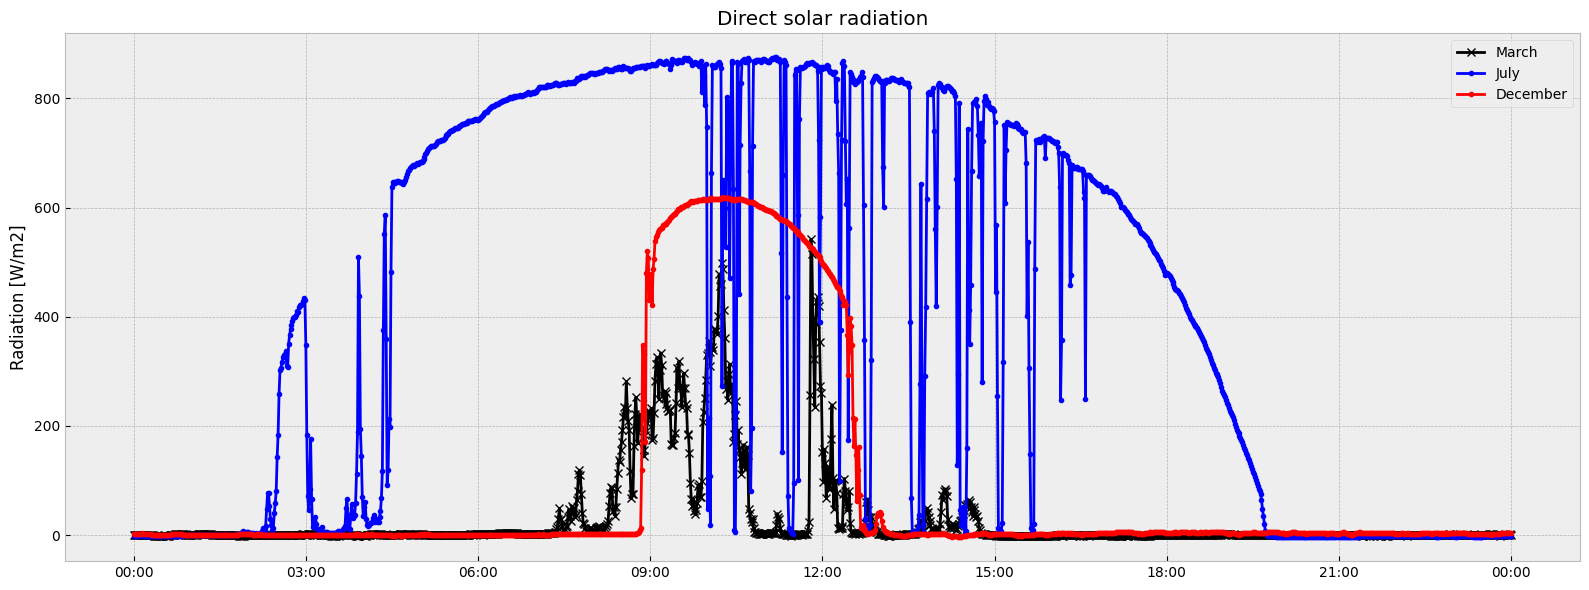

In [5]:
fig, ax = plt.subplots()

plt.plot(data_march.index, data_march.values, label="March", color='black', marker='x')


delta1 = data_march.index[0].date() - data_july.index[0].date()
delta2 =data_march.index[0].date() - data_dec.index[0].date()


plt.plot(data_july.index + pd.offsets.Day(delta1.days), data_july.values, label="July", color='blue', marker='.')

plt.plot(data_dec.index + pd.offsets.Day(delta2.days), data_dec.values, label="December", color='red', marker='.')


plt.legend()
plt.title("Direct solar radiation") 
plt.ylabel("Radiation [W/m2]") 
plt.grid(True)
plt.tight_layout()

#change x ticks
xfmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt)

plt.show() 

The data is from the Jokioinen, Ilmala measuring station, first day of each month in 2021.

The amount of radiation is clearly different in each of the 3 dates. In March, noticeable amounts of radiation appear roughly from 7:00 to 15:00, reaching up to 500 W/m2 and with a lot of variation over the day. In July, noticeable radiation is from 2:00 to 20:00, going up to 900 W/m2, and with some variation during the day. In December, the radiation is noticeable only from roughly 9:00 to 13:00, but the levels wary less and reach up to 600 W/m2. 

Based on the data, July has the highest potential for solar generation over a large period of the day. To efficiently generate solar power in March or July, it must be done within a much shorter period of time during the day. Possible operational costs should be measure against the solar power gains to see if the operation is profitable. The high variation of the radiation during the day in March could be due to the weather on the specific day, for example a very cloudy day which leads to less radiation reaching the measuring station.

**(4) Read the text [What Does the Metaverse Mean for the Future of Energy Consumption?](https://earth.org/metaverse-energy-consumption/). Write a brief analysis of the text based on the relation between data, energy and level of processes. From the energy perspective, is it possible to maintain this kind of technologies? Note: This is clearly not a right/wrong question, but a space to critically think about current issues related to the course.**

The text brings up the fact that the Metaverse would be supported by AI and VR, which in turn require data processing infrastructure for computing and data storage. The computing and storage could be considered the level 0 processes, happening in physical reality, where they have hardware that uses energy to function. Metaverse's computing requirements are said to be too large without using cloud computing, which means that an individual user would not have as much of the physical hardware for storage and computing. Therefore Meta would also hold more responsibility to perform the computing in an energy efficient way. They would have to have very high control of all their data processing facilities to make sure that every process is actually energy efficient.

The text says that Meta has invested in using only renewable energy, producing zero waste, and therefore being carbon neutral. In order to reach the energy demands of the increasing computing amounts for Metaverse to exist, the company would need to also increase the amount of renewable energy they produce to stay carbon neutral. It is hard to say whether this is actually possible, considering that data storage and processing will always require some energy no matter how efficient.

Considering that Metaverse itself would function in symbolic reality, all the subprocesses that are required to make it function do consume a lot of energy, and since the Metaverse would likely want to keep growing in order to grow profits, the amount of higher level processes would then also be expanded. 